<a href="https://colab.research.google.com/github/DEEPAK-RAMGIRI/AIML-LAB/blob/main/WEBSITE_CLASSIFICATION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('website_classification.csv')

In [ ]:
df.head(5)

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [ ]:
nltk.download('stopwords') # to use nltk stopwords we need to download the stopwords
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df.columns

Index(['Unnamed: 0', 'website_url', 'cleaned_website_text', 'Category'], dtype='object')

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
website_url,object
cleaned_website_text,object
Category,object


In [ ]:
df = df.drop(["Unnamed: 0", "website_url"], axis=1)

In [ ]:
pd.DataFrame(df.Category.unique()).values

array([['Travel'],
       ['Social Networking and Messaging'],
       ['News'],
       ['Streaming Services'],
       ['Sports'],
       ['Photography'],
       ['Law and Government'],
       ['Health and Fitness'],
       ['Games'],
       ['E-Commerce'],
       ['Forums'],
       ['Food'],
       [nan]], dtype=object)

In [ ]:
def clean_text(text):
    tokens = word_tokenize(text.lower())
    words = [re.sub(r'[^a-z]', '', word) for word in tokens]
    stop_words = set(stopwords.words('english'))
    filtered = [w for w in words if w and w not in stop_words]
    return ' '.join(filtered)

In [ ]:
df['cleaned_website_text'] = df['cleaned_website_text'].apply(clean_text)

In [ ]:
label_encoder = LabelEncoder()
df['category_id'] = label_encoder.fit_transform(df['Category'])
num_classes = len(label_encoder.classes_)

In [ ]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_website_text']).toarray()

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
y_encoded = df['category_id'].values.reshape(-1, 1)
one_hot_encoder = OneHotEncoder(sparse_output=False)
y = one_hot_encoder.fit_transform(y_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


Training with Adam optimizer...
Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.0869 - loss: 4.0576 - val_accuracy: 0.1301 - val_loss: 4.0880 - learning_rate: 1.0000e-04
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1848 - loss: 3.2897 - val_accuracy: 0.1781 - val_loss: 3.8906 - learning_rate: 1.0000e-04
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2197 - loss: 2.9208 - val_accuracy: 0.2397 - val_loss: 3.7311 - learning_rate: 1.0000e-04
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3067 - loss: 2.5543 - val_accuracy: 0.3356 - val_loss: 3.5742 - learning_rate: 1.0000e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3998 - loss: 2.1127 - val_accuracy: 0.4075 - val_loss: 3.4552 - learning_rate: 1.0000e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5108 - loss: 1.8855 - val_accuracy: 0.4795 - val_loss: 3.3459 - learning_rate: 1.0000e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━

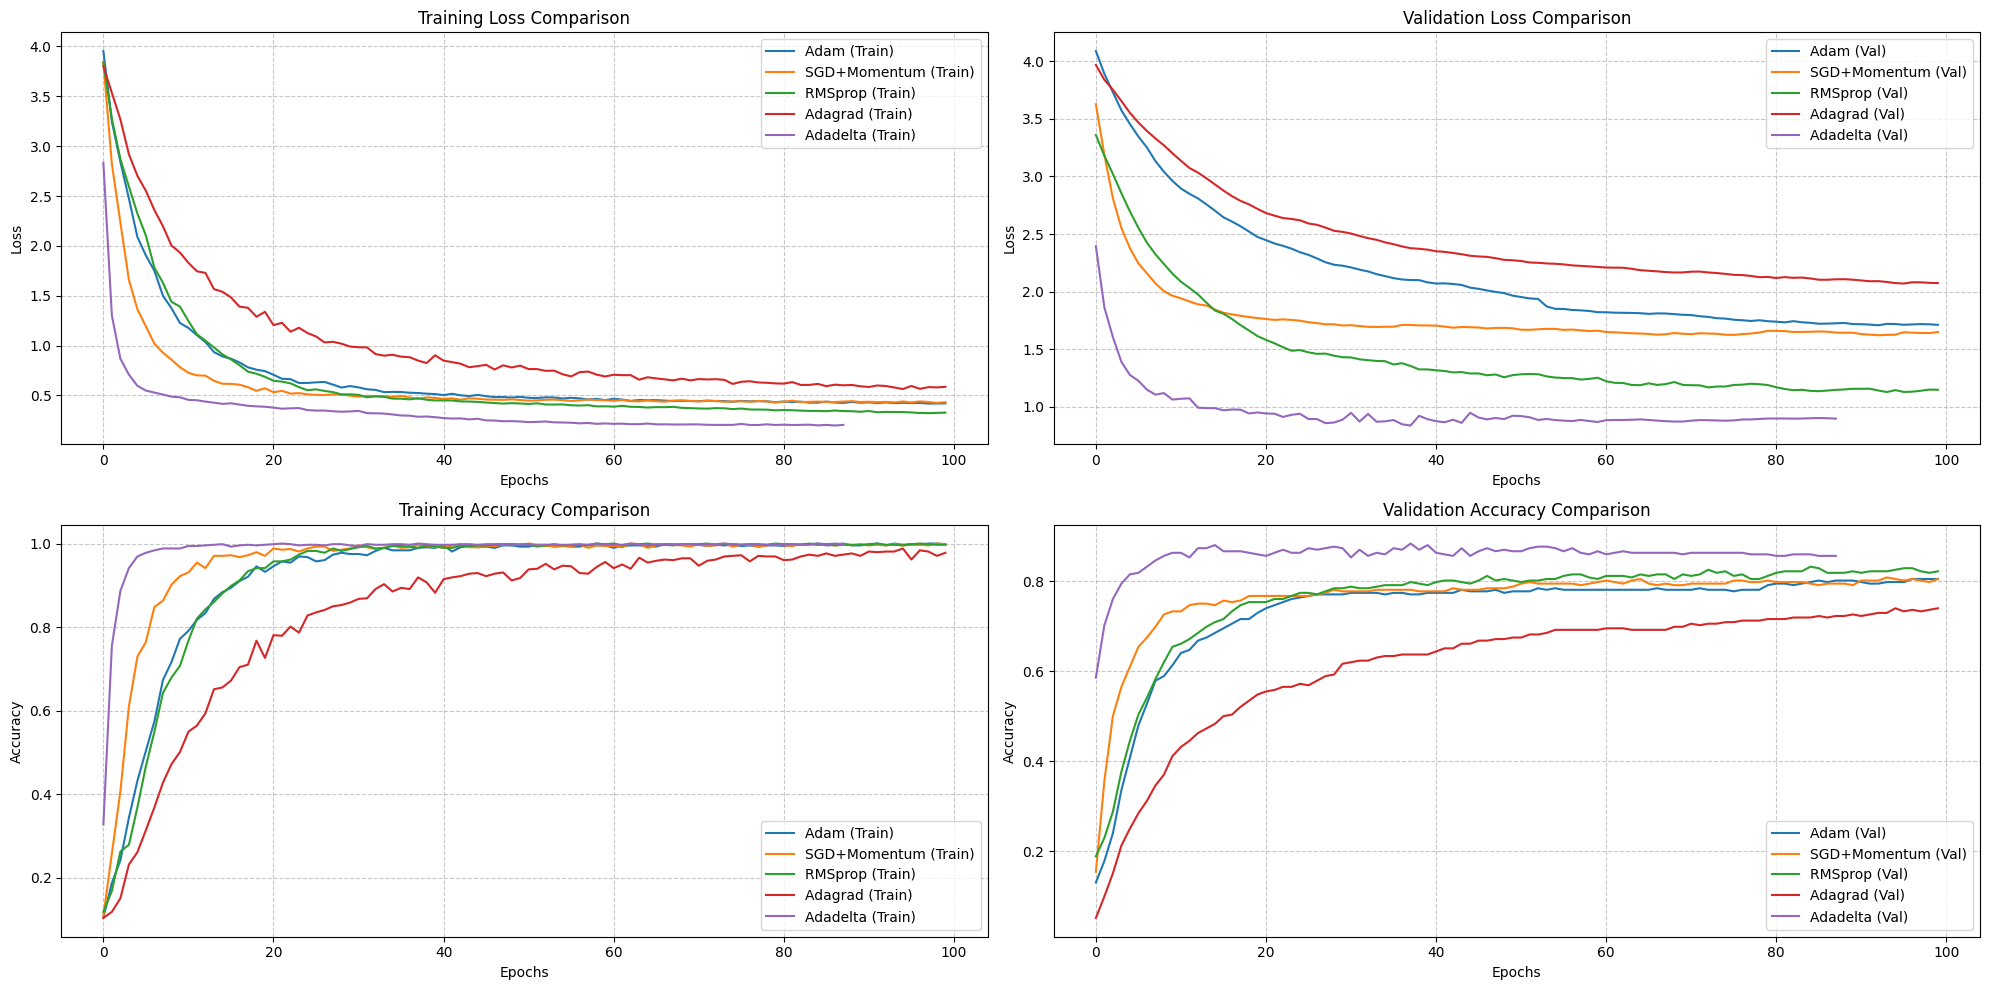

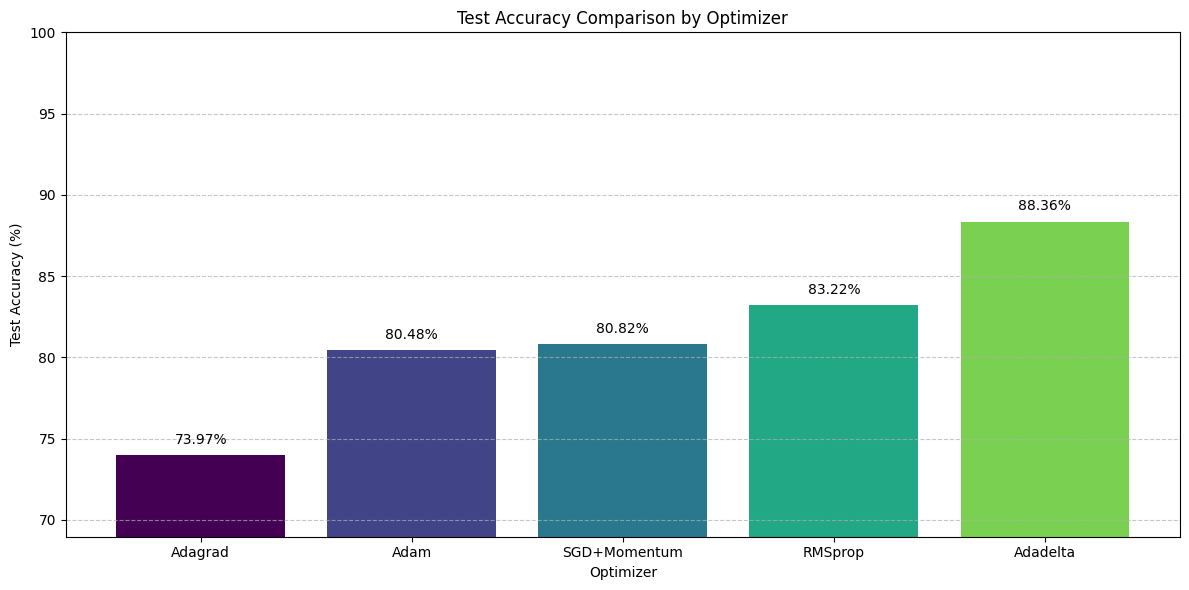

In [ ]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model(dropout_rate=0.3, l2_reg=0.0005, neurons_1=512, neurons_2=256, neurons_3=128):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        # First layer with more neurons
        Dense(neurons_1, activation='relu', kernel_regularizer=l2(l2_reg)),
        BatchNormalization(),
        Dropout(dropout_rate),

        # Second layer
        Dense(neurons_2, activation='relu', kernel_regularizer=l2(l2_reg)),
        BatchNormalization(),
        Dropout(dropout_rate),

        # Added third layer for more capacity
        Dense(neurons_3, activation='relu', kernel_regularizer=l2(l2_reg)),
        BatchNormalization(),
        Dropout(dropout_rate),

        # Output layer
        Dense(num_classes, activation='softmax')
    ])
    return model

# Optimizers with tuned parameters (added 2 more)
optimizers = {
    'Adam': Adam(learning_rate=0.0001),
    'SGD+Momentum': SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
    'RMSprop': RMSprop(learning_rate=0.0001, rho=0.9),
    'Adagrad': Adagrad(learning_rate=0.001),  # Added optimizer
    'Adadelta': Adadelta(learning_rate=1.0)   # Added optimizer
}

# Callbacks
callbacks = [
    # Early stopping with longer patience
    EarlyStopping(
        monitor='val_accuracy',
        patience=50,
        restore_best_weights=True,
        verbose=1
    ),
    # Learning rate scheduler
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-6,
        verbose=1
    )
]

# Results storage
results = []
histories = {}

# Training loop with 100 epochs and smaller batch size
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer...")

    # Create model
    model = build_model(
        dropout_rate=0.3,
        l2_reg=0.0003,
        neurons_1=512,
        neurons_2=256,
        neurons_3=128
    )

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model with 100 epochs
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,        # Reduced to 100 as requested
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate model
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Store results
    results.append({
        "Optimizer": name,
        "Train Loss": round(train_loss, 4),
        "Train Acc": round(train_acc * 100, 4),
        "Test Loss": round(test_loss, 4),
        "Test Acc": round(test_acc * 100, 2)
    })

    histories[name] = history

# Display results table
df_results = pd.DataFrame(results)
print("\n=== Optimizer Comparison ===")
print(df_results)

# Plot learning curves in graphs
plt.figure(figsize=(20, 10))

# Loss plot
plt.subplot(2, 2, 1)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} (Train)')
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Validation loss plot
plt.subplot(2, 2, 2)
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name} (Val)')
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Accuracy plot
plt.subplot(2, 2, 3)
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} (Train)')
plt.title("Training Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Validation accuracy plot
plt.subplot(2, 2, 4)
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} (Val)')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Create bar chart comparison of final results
plt.figure(figsize=(12, 6))

# Extract optimizer names and test accuracies
optimizers_list = df_results['Optimizer'].tolist()
test_accuracies = df_results['Test Acc'].tolist()

# Sort the results by test accuracy
sorted_indices = np.argsort(test_accuracies)
sorted_optimizers = [optimizers_list[i] for i in sorted_indices]
sorted_accuracies = [test_accuracies[i] for i in sorted_indices]

# Create color map
colors = plt.cm.viridis(np.linspace(0, 0.8, len(sorted_optimizers)))

# Create bar chart
bars = plt.bar(sorted_optimizers, sorted_accuracies, color=colors)
plt.title('Test Accuracy Comparison by Optimizer')
plt.xlabel('Optimizer')
plt.ylabel('Test Accuracy (%)')
plt.ylim(min(test_accuracies) - 5, 100)  # Set y-axis limit for better visibility

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(985, 3000)
(423, 3000)
(985, 16)
(423, 16)


Epoch 0, Loss: 0.6972, Training Accuracy: 28.12%
Epoch 500, Loss: 0.0482, Training Accuracy: 99.80%
Epoch 1000, Loss: 0.0212, Training Accuracy: 99.83%
Epoch 1500, Loss: 0.0180, Training Accuracy: 99.83%
Epoch 2000, Loss: 0.0162, Training Accuracy: 99.83%
Epoch 2500, Loss: 0.0030, Training Accuracy: 99.97%
Epoch 3000, Loss: 0.0027, Training Accuracy: 99.97%
Epoch 3500, Loss: 0.0027, Training Accuracy: 99.97%
Epoch 4000, Loss: 0.0027, Training Accuracy: 99.97%
Epoch 4500, Loss: 0.0027, Training Accuracy: 99.97%


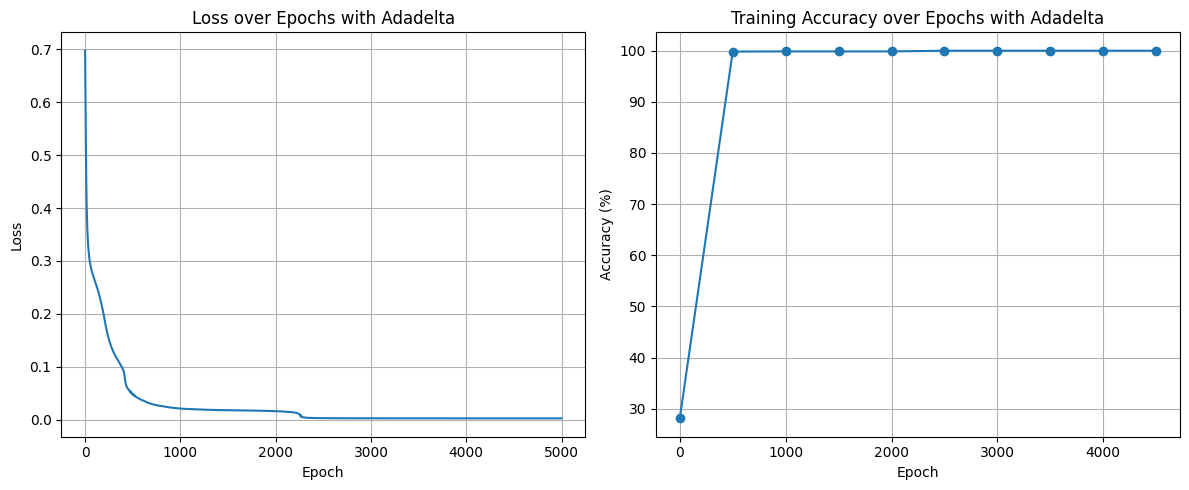

Final Training Accuracy with Adadelta: 99.97%


'\n# Evaluate on test data\nhidden_output_test = sigmoid(np.dot(X_test, W1) + b1)\nfinal_output_test = sigmoid(np.dot(hidden_output_test, W2) + b2)\npredictions_test = (final_output_test > 0.5).astype(int)\ntest_accuracy = np.mean(predictions_test == y_test) * 100\nprint(f"Test Accuracy: {test_accuracy:.2f}%")\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network with Adadelta optimizer
input_neurons = X_train.shape[1]  # 3000 features
hidden_neurons = 16  # Hidden layer with 16 neurons
output_neurons = y_train.shape[1]  # Number of categories (output neurons)

epsilon = 1e-8  # For numerical stability in BCE loss

# Initialize Weights and Biases with smaller initialization scale
np.random.seed(42)
W1 = np.random.randn(input_neurons, hidden_neurons) * 0.01
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_neurons) * 0.01
b2 = np.zeros((1, output_neurons))

# Training Parameters
epochs = 5000
losses = []
accuracies = []
accuracy_epochs = []  # To store which epochs we record accuracy

# Adadelta hyperparameters
rho = 0.95  # Decay rate
epsilon_ada = 1e-6  # Small constant for numerical stability

# Initialize accumulators for Adadelta
# Accumulate squared gradients
grad_W1_acc = np.zeros_like(W1)
grad_b1_acc = np.zeros_like(b1)
grad_W2_acc = np.zeros_like(W2)
grad_b2_acc = np.zeros_like(b2)

# Accumulate squared updates (delta)
delta_W1_acc = np.zeros_like(W1)
delta_b1_acc = np.zeros_like(b1)
delta_W2_acc = np.zeros_like(W2)
delta_b2_acc = np.zeros_like(b2)

# Training Loop
for epoch in range(epochs):
    # 1. Forward Propagation
    hidden_input = np.dot(X_train, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    # Clip the output to avoid log(0) errors
    final_output = np.clip(final_output, epsilon, 1 - epsilon)

    # 2. Compute Loss (Binary Cross-Entropy)
    loss = -np.mean(y_train * np.log(final_output) + (1 - y_train) * np.log(1 - final_output))
    losses.append(loss)

    # 3. Backpropagation - Calculate gradients
    error_output = final_output - y_train
    d_output = error_output * sigmoid_derivative(final_output)

    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Calculate gradients
    grad_W2 = hidden_output.T.dot(d_output)
    grad_b2 = np.sum(d_output, axis=0, keepdims=True)
    grad_W1 = X_train.T.dot(d_hidden)
    grad_b1 = np.sum(d_hidden, axis=0, keepdims=True)

    # 4. Adadelta Update
    # Update accumulated gradient squares
    grad_W2_acc = rho * grad_W2_acc + (1 - rho) * (grad_W2 ** 2)
    grad_b2_acc = rho * grad_b2_acc + (1 - rho) * (grad_b2 ** 2)
    grad_W1_acc = rho * grad_W1_acc + (1 - rho) * (grad_W1 ** 2)
    grad_b1_acc = rho * grad_b1_acc + (1 - rho) * (grad_b1 ** 2)

    # Compute update values
    delta_W2 = -np.sqrt(delta_W2_acc + epsilon_ada) / np.sqrt(grad_W2_acc + epsilon_ada) * grad_W2
    delta_b2 = -np.sqrt(delta_b2_acc + epsilon_ada) / np.sqrt(grad_b2_acc + epsilon_ada) * grad_b2
    delta_W1 = -np.sqrt(delta_W1_acc + epsilon_ada) / np.sqrt(grad_W1_acc + epsilon_ada) * grad_W1
    delta_b1 = -np.sqrt(delta_b1_acc + epsilon_ada) / np.sqrt(grad_b1_acc + epsilon_ada) * grad_b1

    # Update accumulated delta squares
    delta_W2_acc = rho * delta_W2_acc + (1 - rho) * (delta_W2 ** 2)
    delta_b2_acc = rho * delta_b2_acc + (1 - rho) * (delta_b2 ** 2)
    delta_W1_acc = rho * delta_W1_acc + (1 - rho) * (delta_W1 ** 2)
    delta_b1_acc = rho * delta_b1_acc + (1 - rho) * (delta_b1 ** 2)

    # Update weights and biases
    W2 += delta_W2
    b2 += delta_b2
    W1 += delta_W1
    b1 += delta_b1

    # Print loss and accuracy every 500 epochs
    if epoch % 500 == 0:
        # Training accuracy
        predictions = (final_output > 0.5).astype(int)
        accuracy = np.mean(predictions == y_train) * 100
        accuracies.append(accuracy)
        accuracy_epochs.append(epoch)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Training Accuracy: {accuracy:.2f}%")

# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(epochs), losses)
plt.title('Loss over Epochs with Adadelta')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy_epochs, accuracies, marker='o')
plt.title('Training Accuracy over Epochs with Adadelta')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.savefig('neural_network_adadelta_performance.png')  # Save the figure
plt.show()

# Final evaluation
# Forward pass
hidden_output = sigmoid(np.dot(X_train, W1) + b1)
final_output = sigmoid(np.dot(hidden_output, W2) + b2)

# Calculate predictions
predictions = (final_output > 0.5).astype(int)

# Calculate final accuracy
final_accuracy = np.mean(predictions == y_train) * 100
print(f"Final Training Accuracy with Adadelta: {final_accuracy:.2f}%")

# If you have test data, you can evaluate on it as well


In [ ]:
# Evaluate on test data
hidden_output_test = sigmoid(np.dot(X_test, W1) + b1)
final_output_test = sigmoid(np.dot(hidden_output_test, W2) + b2)
predictions_test = (final_output_test > 0.5).astype(int)
test_accuracy = np.mean(predictions_test == y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 97.66%



Confusion Matrix:
[[ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 59.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 67.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 69.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 62.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 63.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0. 67.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 54.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 69.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0. 80.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 72.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]

Overall Accuracy: 0.9970544918998527
Class 0 Accuracy: 1.0000
Class 1 Accuracy: 1.0000
Class 2 Accuracy: 1.0000
Class 3 Accuracy: 1.0000
Class 4 Accuracy: 1.0000
Class 5 Accuracy: 1.0000
Class 6 Accuracy: 1.0000
Class 7 Accuracy: 0.9853
Class 8 Accuracy: 1.0000
Cl

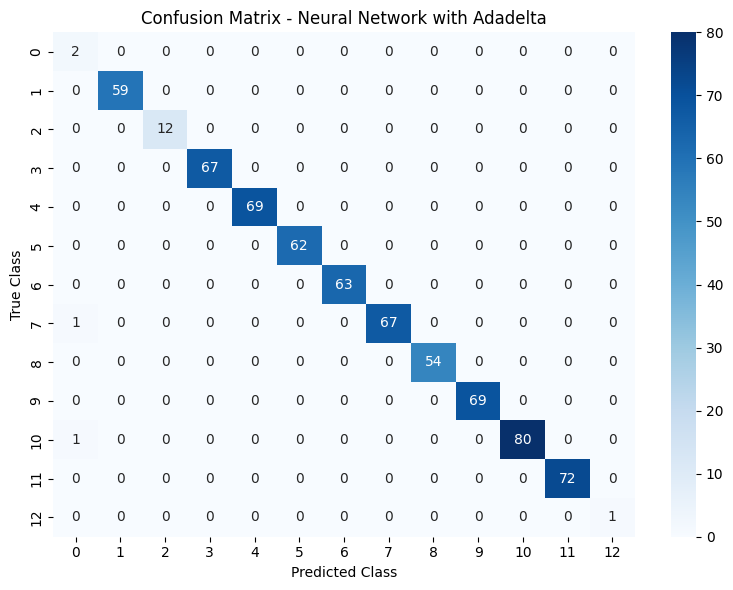

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create confusion matrix manually since we have a special format
def create_confusion_matrix(y_true, y_pred):
    # For binary classification
    if y_true.shape[1] == 1:
        # Convert to 1D arrays if they're 2D with shape (n, 1)
        y_true_flat = y_true.flatten()
        y_pred_flat = y_pred.flatten()

        # Calculate confusion matrix elements
        true_positives = np.sum((y_true_flat == 1) & (y_pred_flat == 1))
        false_positives = np.sum((y_true_flat == 0) & (y_pred_flat == 1))
        false_negatives = np.sum((y_true_flat == 1) & (y_pred_flat == 0))
        true_negatives = np.sum((y_true_flat == 0) & (y_pred_flat == 0))

        # Create the confusion matrix
        return np.array([[true_negatives, false_positives],
                          [false_negatives, true_positives]])
    else:
        # For multi-class, we need to handle it differently
        # This is a simplified version - we'll count each column separately
        num_classes = y_true.shape[1]
        cm = np.zeros((num_classes, num_classes))

        # For each true class
        for i in range(num_classes):
            # Get samples where this class is the true class
            true_samples = np.where(y_true[:, i] == 1)[0]

            # For each of these samples, find which class was predicted
            for sample_idx in true_samples:
                pred_class = np.argmax(y_pred[sample_idx])
                cm[i, pred_class] += 1

        return cm

# Forward pass to get predictions
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def predict(X):
    hidden_output = sigmoid(np.dot(X, W1) + b1)
    final_output = sigmoid(np.dot(hidden_output, W2) + b2)
    return (final_output > 0.5).astype(int)

# Get predicted classes
y_pred = predict(X_train)

# Create confusion matrix manually
cm = create_confusion_matrix(y_train, y_pred)

# Print metrics
print("\nConfusion Matrix:")
print(cm)

# Calculate metrics manually
if y_train.shape[1] == 1:  # Binary classification
    tn, fp, fn, tp = cm.ravel()
    total = tn + fp + fn + tp

    accuracy = (tp + tn) / total if total > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print("\nMetrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
else:  # Multi-class
    # Calculate accuracy
    correct = np.sum(np.diag(cm))
    total = np.sum(cm)
    accuracy = correct / total if total > 0 else 0

    print("\nOverall Accuracy:", accuracy)

    # Per-class metrics
    for i in range(cm.shape[0]):
        class_total = np.sum(cm[i, :])
        class_correct = cm[i, i]
        class_accuracy = class_correct / class_total if class_total > 0 else 0
        print(f"Class {i} Accuracy: {class_accuracy:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')

# Set labels based on the problem type
if y_train.shape[1] == 1:  # Binary classification
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0.5, 1.5], ['Class 0', 'Class 1'])
    plt.yticks([0.5, 1.5], ['Class 0', 'Class 1'])
else:  # Multi-class
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.xticks(np.arange(y_train.shape[1]) + 0.5, range(y_train.shape[1]))
    plt.yticks(np.arange(y_train.shape[1]) + 0.5, range(y_train.shape[1]))

plt.title('Confusion Matrix - Neural Network with Adadelta')
plt.tight_layout()
plt.savefig('confusion_matrix_adadelta.png')
plt.show()